In [ ]:
# location of python scripts
# C:\Users\Akshaye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\Scripts

In [ ]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16013, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 16013 (delta 25), reused 23 (delta 13), pack-reused 15967
Receiving objects: 100% (16013/16013), 14.60 MiB | 21.92 MiB/s, done.
Resolving deltas: 100% (10991/10991), done.


In [ ]:
# !cd yolov5
!pip install -r yolov5/requirements.txt

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## LOAD MODEL

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-10-23 Python-3.10.12 torch-2.1.0+cu118 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 62.1MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make some detection

In [ ]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [ ]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1889.2ms pre-process, 627.8ms inference, 30.2ms NMS per image at shape (1, 3, 384, 640)


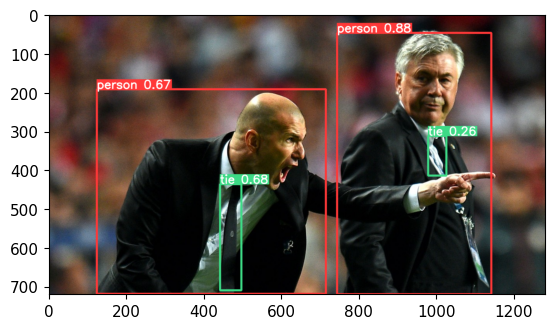

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
np.array(results.render()).shape

(1, 720, 1280, 3)

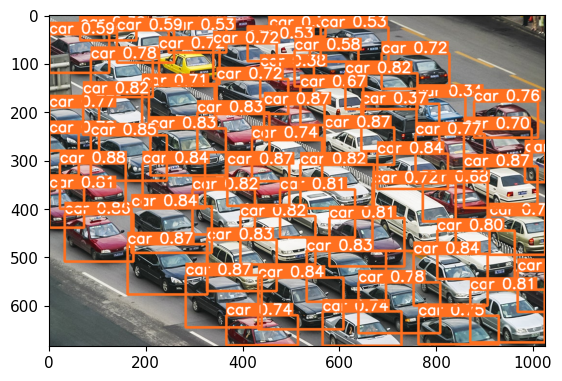

In [ ]:
# new img of traffic
img2 = 'https://media.wired.com/photos/593256b42a990b06268a9e21/master/w_1920,c_limit/traffic-jam-getty.jpg'
new_results = model(img2)
plt.imshow(np.squeeze(new_results.render()))
plt.show()

# Real time detection

In [ ]:
# accessing webcam
cap = cv2.VideoCapture(0)

# while capture device is open
while cap.isOpened():
  # getting back the returned value + the image after reading the capture
  ret, frame = cap.read()
  # name of the variable shown on top
  cv2.imshow('YOLO', frame)

  # checking if in between a couple of frames the 'Q' keybord button is pressed
  if cv2.waitKey(10) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2

# Loop through camera indices
for i in range(10):  # You can adjust the range as needed
    cap = cv2.VideoCapture(i)

    # Check if the VideoCapture object is opened successfully
    if cap.isOpened():
        print(f"Camera index {i} is available.")
        cap.release()  # Release the camera capture object
    else:
        print(f"Camera index {i} is not available.")

Camera index 0 is not available.
Camera index 1 is not available.
Camera index 2 is not available.
Camera index 3 is not available.
Camera index 4 is not available.
Camera index 5 is not available.
Camera index 6 is not available.
Camera index 7 is not available.
Camera index 8 is not available.
Camera index 9 is not available.


In [ ]:
!pip install opencv-python-headless